# Portfolio Part 4 - Analysis of Airline Passenger Satisfaction Data

## Data Source

The dataset used for the analysis of Airline Passenger Satisfaction is sourced from Kaggle. Detailed data about airline passengers, their flight experiences, and satisfaction levels can be accessed through the following link:

[Kaggle Dataset: Airline Quality Ratings](https://www.kaggle.com/datasets/mikhail1681/airline-quality-ratings)

This dataset includes over 120,000 ratings covering various aspects of the airline service, making it a comprehensive resource for understanding factors influencing passenger satisfaction.


### Explanation of Each Column in the Airline Passenger Satisfaction Dataset

| Column Name                            | Explanation                                                  |
|:---------------------------------------|:-------------------------------------------------------------|
| **ID**                                 | Unique identifier for each passenger                         |
| **Gender**                             | Gender of the passenger                                      |
| **Age**                                | Age of the passenger                                         |
| **Customer Type**                      | Type of customer (Returning, First-Time)                     |
| **Type of Travel**                     | Purpose of the flight (Business, Personal)                   |
| **Class**                              | Travel class (Economy, Business, First Class)                |
| **Flight Distance**                    | Distance of the flight in miles                              |
| **Departure Delay**                    | Delay at departure measured in minutes                       |
| **Arrival Delay**                      | Delay at arrival measured in minutes                         |
| **Departure & Arrival Time Convenience** | Convenience rating for departure and arrival times         |
| **Ease of Online Booking**             | Ease of booking the flight online                            |
| **Check-in Service**                   | Rating of the check-in service                               |
| **Online Boarding**                    | Rating of the online boarding process                        |
| **Gate Location**                      | Rating of the convenience of the gate location               |
| **On-board Service**                   | Rating of the service provided on board                      |
| **Seat Comfort**                       | Rating of the comfort of the seats                           |
| **Leg Room Service**                   | Rating of the leg room service                               |
| **Cleanliness**                        | Rating of the cleanliness of the environment                 |
| **Food and Drink**                     | Rating of the quality of food and drinks                     |
| **In-flight Service**                  | Rating of the in-flight service                              |
| **In-flight Wifi Service**             | Rating of the in-flight WiFi service                         |
| **In-flight Entertainment**            | Rating of the in-flight entertainment offerings              |
| **Baggage Handling**                   | Rating of the baggage handling                               |
| **Satisfaction**                       | Level of satisfaction (satisfied, neutral or dissatisfied)   |


This table can be used to quickly reference what each column in the dataset represents, providing a clear framework for further analysis or model training.


## Purposes of Analyzing the Airline Passenger Satisfaction Dataset

The analysis of the Airline Passenger Satisfaction dataset is fundamental in deriving actionable insights to enhance customer service, improve operational efficiencies, and support strategic decision-making. Here are the primary objectives and expected outcomes of this analysis:

### 1. **Improve Customer Service**
   - **Objective:** Determine the critical factors that contribute to passenger satisfaction.
   - **Outcome:** Implement improvements in key service areas such as on-board services, check-in process, and in-flight amenities to enhance customer satisfaction.

### 2. **Enhance Operational Efficiency**
   - **Objective:** Analyze the effects of flight delays on passenger satisfaction.
   - **Outcome:** Develop strategies to reduce delay occurrences or mitigate their impact on passenger experience.

### 3. **Segmentation of Passenger Preferences**
   - **Objective:** Use different types of data (Class, Type of Travel) to predict satisfaction of customers.
   - **Outcome:** How improvements can be made in different class and Type of Travel to enhance passenger experience and satisfaction.

### 4. **Predictive Modelling**
   - **Objective:** Develop different models to predict passenger satisfaction accurately.
        - **4a. Logistic Regression Model**
        - **4a. K-Nearest Neighbors (KNN) Model**
        - **4a. Neural Network Model**
        - **4a. Random Forest Model**
   - **Outcome:** Determine the accuracy of the models.   

### 5. **Model Accuracy Visualization**
   - **Objective:** Evaluate and compare the accuracy of various predictive models to determine the most effective approach for predicting passenger satisfaction.
   - **Outcome:** Visualizing the accuracy of different models helps in identifying the most effective predictive techniques for understanding passenger satisfaction. This comparison enables data-driven decisions about which model to deploy for operational use. Additionally, it highlights potential areas for model refinement and development, ensuring continuous improvement in predictive performance and, consequently, more tailored and effective service offerings.

### 6. **Strategic Decision Making**
   - **Objective:** Leverage insights from the dataset to inform broader strategic decisions regarding service offerings, and customer relationship management.
   - **Outcome:** Strengthen competitive positioning and market presence through informed, data-driven strategies.

Each of these objectives is aimed at leveraging data to not only boost passenger satisfaction but also to drive growth and improve operational effectiveness across the airline.

## Student Details

**Name:** Tayalarajan Thamodararaj Ramanujadurai  
**Student ID:** 48311251

In [1]:
# Importing required libraries and modules
# Data manipulation and analysis libraries
import pandas as pd
import numpy as np
# Visualization libraries
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
# Sklearn modules
from sklearn.datasets import make_classification  
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
# TensorFlow and Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping

## Data Preparation and Exploration

This section focuses on preparing the airline dataset for analysis by performing essential data cleaning tasks. This process includes:

- **Checking for Missing Values**: Identifies any missing data within each column and handles it appropriately, typically by filling in missing values with statistical measures such as the mean or median.

- **Identifying and Removing Outliers**: Detects outliers that could skew the analysis and removes or adjusts these as necessary to ensure a more accurate dataset.

- **Exploring the Dataset**: Explores the dataset to understand its structure, the distribution of key variables, and identify potential issues that might affect the analysis.

These steps are crucial for ensuring that the data is accurate and reliable, forming a solid foundation for subsequent predictive modeling and analysis.


In [2]:
#Reading the data from .csv file
airlines_df = pd.read_csv('Airline Quality Ratings.csv')

In [3]:
#Displaying the dataframe
airlines_df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [4]:
# Display basic information about the DataFrame
print("Data Information:")
print(airlines_df.info())

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking    

In [5]:
# Checking for missing values in each column
print("Count of missing values in each column before replacement:")
print(airlines_df.isnull().sum())

Count of missing values in each column before replacement:
ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Servic

In [6]:
# Replacing missing values with the mean for the 'Arrival Delay' numerical column
airlines_df['Arrival Delay'].fillna(airlines_df['Arrival Delay'].mean(), inplace=True)

# Re-checking for missing values in each column after replacement
print("Count of missing values in each column after replacement:")
print(airlines_df.isnull().sum())

Count of missing values in each column after replacement:
ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertai

In [7]:
# Define the numerical columns
numerical_columns = [
    'Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay',
    'Departure and Arrival Time Convenience', 'Ease of Online Booking',
    'Check-in Service', 'Online Boarding', 'Gate Location', 'On-board Service',
    'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink',
    'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment',
    'Baggage Handling'
]
# Filter the DataFrame to include only the numerical columns
numerical_df = airlines_df[numerical_columns]
# Calculate the interquartile range (IQR) for each numerical column
Q1 = numerical_df.quantile(0.25)
Q3 = numerical_df.quantile(0.75)
IQR = Q3 - Q1
# Determine the threshold for outliers
outlier_threshold = 1.5
# Identify rows containing outliers in any numerical column
outliers = ((numerical_df < (Q1 - outlier_threshold * IQR)) | (numerical_df > (Q3 + outlier_threshold * IQR)))
# Count the number of outliers in each numerical column
outliers_count=outliers.sum()

print("Outliers count in each numerical columns:")
print(outliers_count)

Outliers count in each numerical columns:
Age                                           0
Flight Distance                            2855
Departure Delay                           18098
Arrival Delay                             17492
Departure and Arrival Time Convenience        0
Ease of Online Booking                        0
Check-in Service                          16109
Online Boarding                               0
Gate Location                                 0
On-board Service                              0
Seat Comfort                                  0
Leg Room Service                              0
Cleanliness                                   0
Food and Drink                                0
In-flight Service                             0
In-flight Wifi Service                        0
In-flight Entertainment                       0
Baggage Handling                              0
dtype: int64


In [8]:
# Remove rows containing outliers
cleaned_df = airlines_df[~outliers.any(axis=1)]

# Display the shape of the original and cleaned DataFrames
print("Original DataFrame shape:", airlines_df.shape)
print("Cleaned DataFrame shape:", cleaned_df.shape)

Original DataFrame shape: (129880, 24)
Cleaned DataFrame shape: (93648, 24)


In [9]:
# Instantiate a LabelEncoder
label_encoder = LabelEncoder()

# Dictionary to store label encodings
label_mappings = {}

# Identify all categorical columns (assumes 'object' dtype for categorical)
categorical_columns = cleaned_df.select_dtypes(include=['object']).columns

# Apply label encoding using .assign()
for column in categorical_columns:
    # Temporarily store encoded column
    encoded_column = label_encoder.fit_transform(cleaned_df[column])
    label_mappings[column] = {index: label for index, label in enumerate(label_encoder.classes_)}
    # Use assign to update the DataFrame
    cleaned_df = cleaned_df.assign(**{column: encoded_column})

# Print the mappings
for column, mapping in label_mappings.items():
    print(f'Mapping for {column}: {mapping}')

Mapping for Gender: {0: 'Female', 1: 'Male'}
Mapping for Customer Type: {0: 'First-time', 1: 'Returning'}
Mapping for Type of Travel: {0: 'Business', 1: 'Personal'}
Mapping for Class: {0: 'Business', 1: 'Economy', 2: 'Economy Plus'}
Mapping for Satisfaction: {0: 'Neutral or Dissatisfied', 1: 'Satisfied'}


In the above section details several steps taken to prepare the airline dataset for further analysis:

- **Data Loading**: Loaded from a CSV into a pandas DataFrame for exploration.
  
- **Data Inspection**: The initial review of the data reveals its structure and types.

- **Handling Missing Values**: Missing values in 'Arrival Delay' are filled with the column's mean to complete the dataset.

- **Outlier Detection and Removal**: Outliers in numerical columns are identified using the Interquartile Range (IQR) and removed to normalize data.

- **Data Encoding**: Categorical data is transformed using label encoding, with mappings stored for future use.

These steps optimize the dataset for analysis by removing potential inaccuracies and anomalies.


## 1. Improve Customer Service

### Objective
Identify critical factors influencing passenger satisfaction based on dataset correlations.

## Studying the Correlation Between 'Satisfaction' and Other Columns

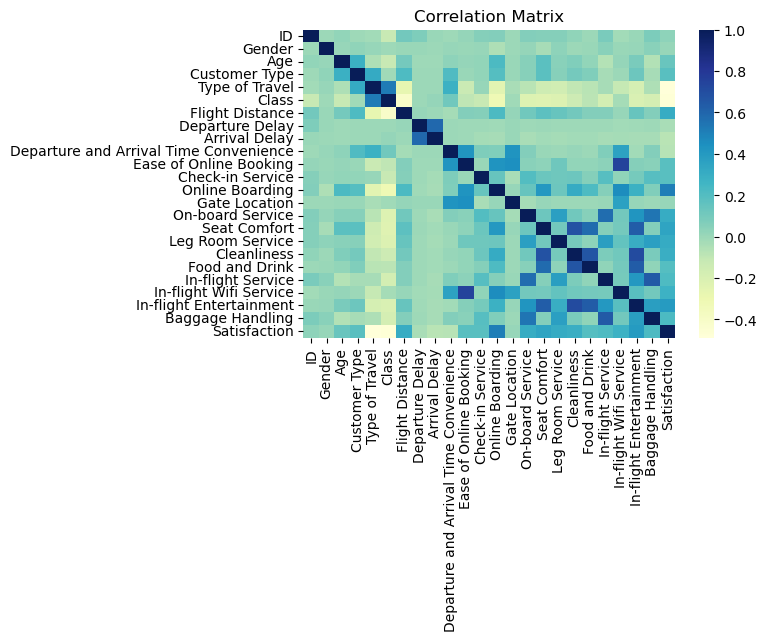

In [10]:
# Calculate the correlation matrix
correlation_matrix = cleaned_df.corr()

# Visualize the correlation matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, cmap="YlGnBu", xticklabels=True, yticklabels=True)
plt.title("Correlation Matrix")
plt.show()

In [11]:
# Calculate the correlation of 'Satisfaction' with other features and sort them in descending order
satisfaction_correlation = correlation_matrix['Satisfaction'].sort_values(ascending=False)

# The sorted correlations from most positive to most negative
print("Correlation of Satisfaction with other features (Most correlated to least):")
print(satisfaction_correlation)

Correlation of Satisfaction with other features (Most correlated to least):
Satisfaction                              1.000000
Online Boarding                           0.508265
In-flight Entertainment                   0.390191
Seat Comfort                              0.345562
Leg Room Service                          0.313230
On-board Service                          0.306936
Flight Distance                           0.303749
Cleanliness                               0.296636
In-flight Wifi Service                    0.277998
Baggage Handling                          0.227046
In-flight Service                         0.220526
Food and Drink                            0.195326
Customer Type                             0.184593
Check-in Service                          0.182724
Ease of Online Booking                    0.181683
Age                                       0.138528
ID                                        0.030373
Gender                                    0.011111
Gate L

In [12]:
# Selecting features with correlation coefficient greater than 0.3 (absolute value)
features = satisfaction_correlation[satisfaction_correlation.abs() > 0.3].index.tolist()
selected_correlations = satisfaction_correlation[satisfaction_correlation.abs() > 0.3][1:]  # Exclude 'Satisfaction'

In [13]:
# Removing 'Satisfaction' from the selected features list to focus on predictors
selected_features = features[1:]

# Displaying selected features for predicting Satisfaction, including their correlation values
print("Selected features for predicting Satisfaction along with their correlation values:")
print(f"{'Feature':<25} {'Correlation':>10}")
for feature in selected_features:
    print(f"{feature:<25} {selected_correlations[feature]:>10.5f}")

Selected features for predicting Satisfaction along with their correlation values:
Feature                   Correlation
Online Boarding              0.50827
In-flight Entertainment      0.39019
Seat Comfort                 0.34556
Leg Room Service             0.31323
On-board Service             0.30694
Flight Distance              0.30375
Class                       -0.47164
Type of Travel              -0.48723


### Key Findings

Key factors influencing passenger satisfaction include:

| Factor                  | Correlation | Description                                                        |
|:------------------------|:------------|:-------------------------------------------------------------------|
| **Online Boarding**     | 0.508265    | Most influential, highlighting the importance of smooth online processes. |
| **In-flight Entertainment** | 0.390191 | Essential for passenger engagement during flights.                 |
| **Seat Comfort**        | 0.345562    | Critical for long-haul comfort.                                    |
| **Leg Room Service**    | 0.313230    | Valued for overall comfort.                                        |
| **On-board Service**    | 0.306936    | Significantly impacts satisfaction.                                |
| **Flight Distance**     | 0.303749    | Longer flights potentially affect satisfaction.                    |
| **Class**               | -0.471642   | Higher classes correlate with greater satisfaction.                |
| **Type of Travel**      | -0.487225   | Business travel often rates higher than leisure.                   |

### Outcome
Strategic improvements based on findings to boost satisfaction:
- **Streamline Online Boarding:** Enhance user-friendliness and efficiency.
- **Upgrade Entertainment Options:** Cater to diverse preferences.
- **Enhance Seat Comfort and Leg Room:** Reconfigure seating for more space.
- **Improve Service Quality:** Focus on consistent, high-quality on-board service.
- **Focus on Economy Class:** Boost experience to elevate satisfaction.
- **Tailor Services for Leisure Travel:** Align amenities to meet leisure travel needs.

These actions aim to enhance overall passenger experience and satisfaction.

## 2. Enhancing Operational Efficiency

### Objective
Analyze the effects of flight delays on passenger satisfaction.

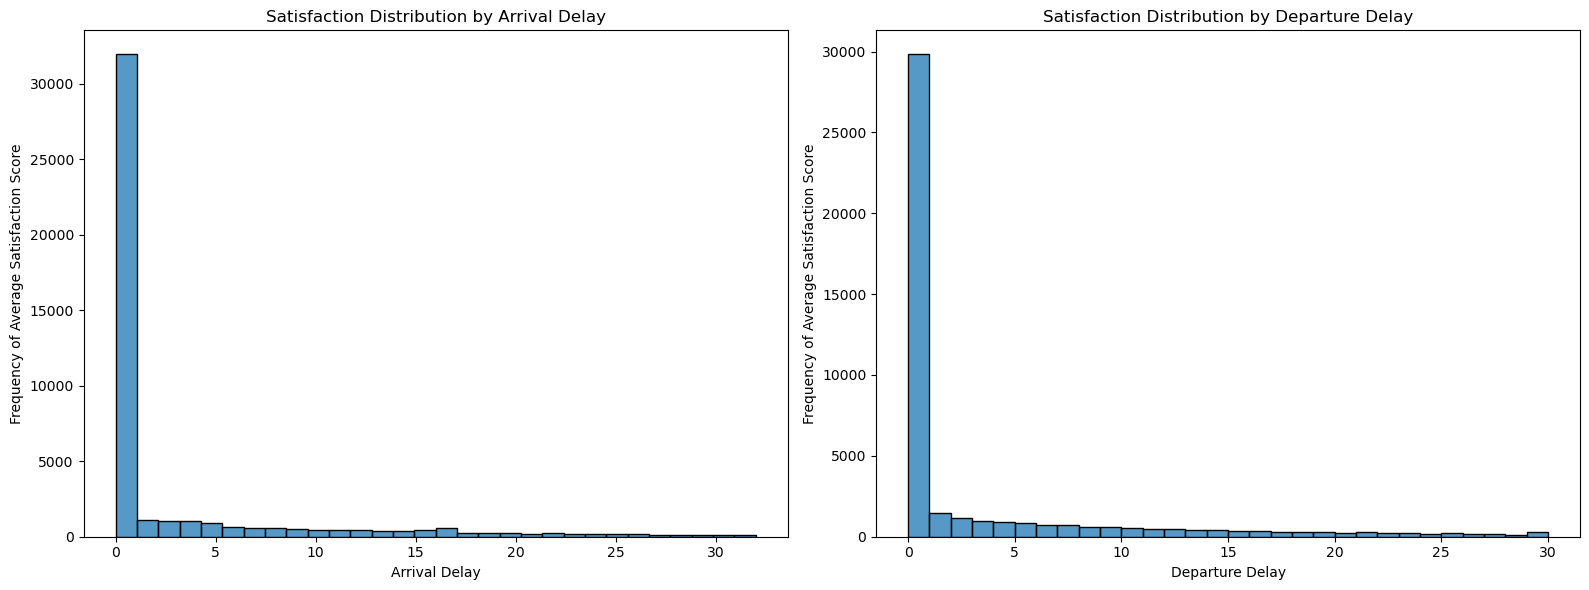

In [14]:
# Set up the matplotlib figure
fig, axes = plt.subplots(ncols=2, figsize=(16, 6))

# Histogram for satisfaction by Arrival Delay
sns.histplot(data=cleaned_df, x='Arrival Delay', weights='Satisfaction', bins=30, ax=axes[0], kde=False)
axes[0].set_title('Satisfaction Distribution by Arrival Delay')
axes[0].set_xlabel('Arrival Delay')
axes[0].set_ylabel('Frequency of Average Satisfaction Score')

# Histogram for satisfaction by Departure Delay
sns.histplot(data=cleaned_df, x='Departure Delay', weights='Satisfaction', bins=30, ax=axes[1], kde=False)
axes[1].set_title('Satisfaction Distribution by Departure Delay')
axes[1].set_xlabel('Departure Delay')
axes[1].set_ylabel('Frequency of Average Satisfaction Score')

# Improve layout to avoid overlap and display the plot
plt.tight_layout()
plt.show()

### Key Findings:
- **High Satisfaction with No Delays**: The majority of passengers experience high satisfaction levels with zero delay, as evidenced by the high frequency of satisfaction scores in the zero-delay bin.
- **Decrease in Satisfaction with Increased Delays**: There is a noticeable drop in satisfaction as delays increase, particularly beyond the zero-delay bin. This trend indicates a negative correlation between delay duration and passenger satisfaction.
- **Sparse Satisfaction on Longer Delays**: Satisfaction for longer delays (beyond 10 minutes) is sparse, clearly indicating that satisfaction decreases significantly after a 10-minute delay.

### Outcome:
To boost operational efficiency and passenger satisfaction, consider these strategies:

1. **Prioritize On-Time Performance**: Enhance on-time performance by optimizing schedules and improving operational efficiency to meet passengers' preferences for no delays.
2. **Effective Communication Strategies**: Establish clear communication during delays, ensuring passengers receive timely updates and transparent information about the causes and expected delay durations.
3. **Implement Service Recovery Measures**: Offer compensation, amenities, or alternative travel options for delays to reduce the negative impact on satisfaction.

These focused efforts can significantly improve passenger experiences and satisfaction, even during unavoidable delays.

## 3. Segmentation of Passenger Preferences

### Objective
Use different types of data (Class, Type of Travel) to predict satisfaction of customers.

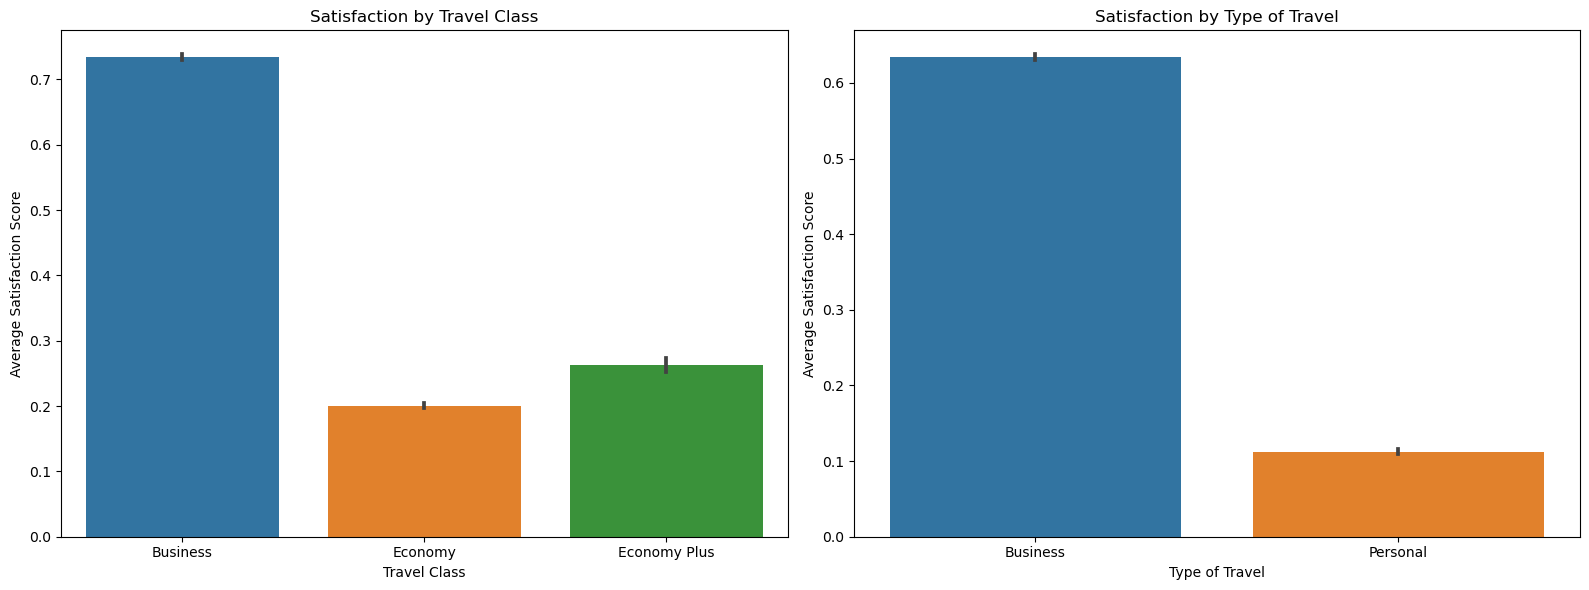

In [15]:
# Correct method to apply mappings using .loc to avoid SettingWithCopyWarning
cleaned_df.loc[:, 'Class Category'] = cleaned_df['Class'].map({0: 'Business', 1: 'Economy', 2: 'Economy Plus'})
cleaned_df.loc[:, 'Type of Travel Category'] = cleaned_df['Type of Travel'].map({0: 'Business', 1: 'Personal'})

# Set up the matplotlib figure
fig, axes = plt.subplots(ncols=2, figsize=(16, 6))  # Two columns for each plot

# Bar plot for satisfaction by Travel Class
sns.barplot(x='Class Category', y='Satisfaction', data=cleaned_df, ax=axes[0])
axes[0].set_title('Satisfaction by Travel Class')
axes[0].set_xlabel('Travel Class')
axes[0].set_ylabel('Average Satisfaction Score')

# Bar plot for satisfaction by Type of Travel
sns.barplot(x='Type of Travel Category', y='Satisfaction', data=cleaned_df, ax=axes[1])
axes[1].set_title('Satisfaction by Type of Travel')
axes[1].set_xlabel('Type of Travel')
axes[1].set_ylabel('Average Satisfaction Score')

# Improve layout to avoid overlap and display the plot
plt.tight_layout()
plt.show()

### Key Findings

#### Satisfaction by Travel Class
- **Business Class**: Exhibits the highest satisfaction with a score of approximately 0.65, reflecting the effectiveness of services and amenities.
- **Economy Plus**: Registers moderate satisfaction at around 0.35, suggesting there's potential for improvement.
- **Economy**: Shows the lowest satisfaction at about 0.25, indicating a significant need for enhancements.

#### Satisfaction by Type of Travel
- **Business Travel**: Scores high on satisfaction (~0.6), likely due to prioritized services for business travelers.
- **Personal Travel**: Scores lower (~0.15), highlighting a possible disparity in service perception between business and personal travel.

### Outcome

#### Enhancements and Strategies
- **Enhance Services**: Focus on improving amenities in Economy and Economy Plus to elevate satisfaction levels.
- **Targeted Marketing**: Emphasize the benefits of upgrading, particularly targeting personal travelers to encourage opting for higher-class travel.
- **Continuous Feedback**: Implement a regular feedback collection and analysis system to continuously refine services and better align with passenger expectations.

These initiatives aim to target service improvements and strategic marketing to boost passenger satisfaction and foster airline growth.


### 4. Predictive Modelling

### Objective
Develop different models to predict passenger satisfaction accurately.

### Split the dataset (Trainging set : Test set = 8 : 2)

In [16]:
train_set, test_set = train_test_split(cleaned_df, test_size=0.2, random_state=10)
print("Training set shape:", train_set.shape, "which is {:.2%} of the original dataset.".format(len(train_set) / len(cleaned_df)))
print("Test set shape:", test_set.shape, "which is {:.2%} of the original dataset.".format(len(test_set) / len(cleaned_df)))

Training set shape: (74918, 26) which is 80.00% of the original dataset.
Test set shape: (18730, 26) which is 20.00% of the original dataset.


### 4a. Train a logistic regression model to predict 'Satisfaction' based on the selected features.

In [17]:
# Define features (X) and target variable (y) for training and test sets
X_train = train_set[selected_features]
y_train = train_set['Satisfaction']
X_test = test_set[selected_features]
y_test = test_set['Satisfaction']

# Train a logistic regression model
logreg_model = LogisticRegression(C=0.1, max_iter=1000)
logreg_model.fit(X_train, y_train)

# Make predictions on training and test sets
train_predictions = logreg_model.predict(X_train)
test_predictions = logreg_model.predict(X_test)

### Calculating the accuracy of the Logical Regression model.

In [18]:
# Calculate accuracy on test sets
test_accuracy = accuracy_score(y_test, test_predictions)
logistic_test_accuracy = test_accuracy

print("Accuracy of Logistic Regression model on the test set:", test_accuracy)
print("{:.2%}".format(test_accuracy), "of the test instances were correctly classified.")

Accuracy of Logistic Regression model on the test set: 0.8507741591030432
85.08% of the test instances were correctly classified.


### 4b. Train a KNN model to predict 'Satisfaction' based on the selected features. 

In [19]:
# Initialize the StandardScaler
scaler = StandardScaler()
# Scale the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_scaled, y_train)

# Make predictions on training and test sets
train_predictions_scaled = knn_model.predict(X_train_scaled)
test_predictions_scaled = knn_model.predict(X_test_scaled)

### Calculating the accuracy of the KNN model

In [20]:
# Calculate accuracy on test sets
test_accuracy = accuracy_score(y_test, test_predictions_scaled)
knn_test_accuracy = test_accuracy

# Print accuracy of the KNN model
print("Accuracy of KNN model on the test set:", test_accuracy)
print("{:.2%}".format(test_accuracy), "of the test instances were correctly classified.")

Accuracy of KNN model on the test set: 0.8841430859583556
88.41% of the test instances were correctly classified.


### Classification Report for the KNN model

In [21]:
#Evaluating KNN Model
print("KNN Classification Report for test set:\n", classification_report(y_test, test_predictions_scaled))

KNN Classification Report for test set:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89      9824
           1       0.89      0.86      0.88      8906

    accuracy                           0.88     18730
   macro avg       0.88      0.88      0.88     18730
weighted avg       0.88      0.88      0.88     18730



### Tune the Hyper-parameter 'K' in KNN Using GridSearchCV

In [22]:
# Define the parameter grid
param_grid = {'n_neighbors': range(1, 20)}

# Grid search for the best parameters
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best number of neighbors
best_k = grid_search.best_params_['n_neighbors']

# Retrain with the best parameter
knn_model_opt = KNeighborsClassifier(n_neighbors=best_k)
knn_model_opt.fit(X_train_scaled, y_train)

# Recalculate accuracy
test_predictions_opt = knn_model_opt.predict(X_test_scaled)
# Calculate accuracy on test sets
test_accuracy = accuracy_score(y_test, test_predictions_opt)
knn_grid_search_test_accuracy = test_accuracy

### Calculating the Accuracy of the KNN Model Using Grid Search

In [23]:
# Print accuracy of the KNN Model with Grid Search
print("Accuracy of KNN Model with Grid Search on the test set:", test_accuracy)
print("{:.2%}".format(test_accuracy), "of the test instances were correctly classified.")

Accuracy of KNN Model with Grid Search on the test set: 0.8934329951948745
89.34% of the test instances were correctly classified.


### Classification Report for the KNN Model Using Grid Search

In [24]:
#Evaluating KNN Model
print("KNN Model with Grid Search Classification Report for test set:\n", classification_report(y_test, test_predictions_opt))

KNN Model with Grid Search Classification Report for test set:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      9824
           1       0.91      0.86      0.88      8906

    accuracy                           0.89     18730
   macro avg       0.90      0.89      0.89     18730
weighted avg       0.89      0.89      0.89     18730



### Visualizing the Results

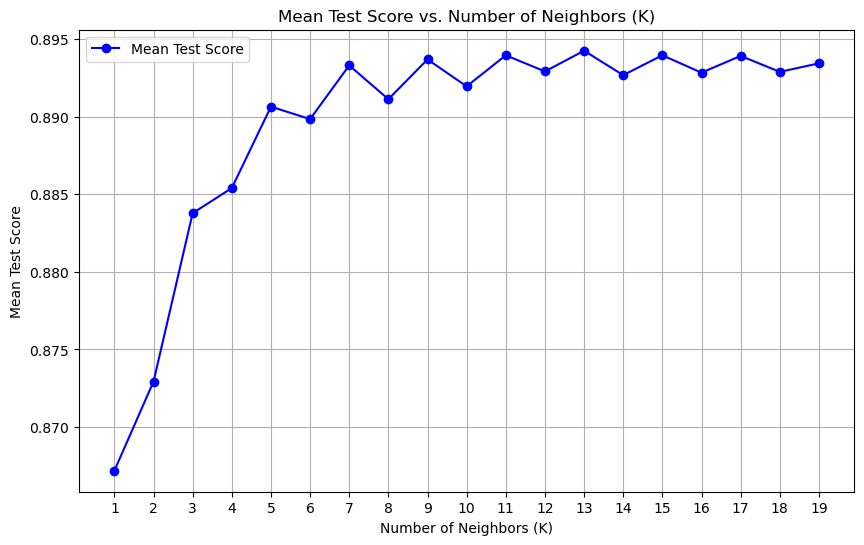

In [25]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(param_grid['n_neighbors'], grid_search.cv_results_['mean_test_score'], marker='o', color='b', label='Mean Test Score')
plt.title('Mean Test Score vs. Number of Neighbors (K)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Test Score')
plt.xticks(param_grid['n_neighbors'])
plt.grid(True)
plt.legend()
plt.show()

In [26]:
print("Best 'K' found neighbors:", best_k)
print("Best accuracy:", grid_search.best_score_)

Best 'K' found neighbors: 13
Best accuracy: 0.8942443935125052


### 4c. Train a Neural Network Model to predict 'Satisfaction' based on the selected features.

In [27]:
# Initialize the StandardScaler
scaler = StandardScaler()
# Scale the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
# Model Definition
# Define a Sequential model for binary classification
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),  
    Dense(128, activation='relu'),  
    Dropout(0.2),  
    Dense(64, activation='relu'),  
    Dropout(0.2),  
    Dense(1, activation='sigmoid')
])

# Model Compilation
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
# Early Stopping Configuration
early_stopping_monitor = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    restore_best_weights=True
)

# Model Training
# Fit the model with early stopping to avoid overfitting.
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,  
    batch_size=10,  
    verbose=1,  
    validation_split=0.2,  
    callbacks=[early_stopping_monitor]  # Include early stopping in the training process
)

Epoch 1/100
5994/5994 ━━━━━━━━━━━━━━━━━━━━ 3s 397us/step - accuracy: 0.8641 - loss: 0.3309 - val_accuracy: 0.8900 - val_loss: 0.2729
Epoch 2/100
5994/5994 ━━━━━━━━━━━━━━━━━━━━ 2s 389us/step - accuracy: 0.8866 - loss: 0.2783 - val_accuracy: 0.8931 - val_loss: 0.2573
Epoch 3/100
5994/5994 ━━━━━━━━━━━━━━━━━━━━ 2s 388us/step - accuracy: 0.8905 - loss: 0.2688 - val_accuracy: 0.9003 - val_loss: 0.2513
Epoch 4/100
5994/5994 ━━━━━━━━━━━━━━━━━━━━ 2s 388us/step - accuracy: 0.8952 - loss: 0.2622 - val_accuracy: 0.9024 - val_loss: 0.2455
Epoch 5/100
5994/5994 ━━━━━━━━━━━━━━━━━━━━ 2s 389us/step - accuracy: 0.8975 - loss: 0.2524 - val_accuracy: 0.9018 - val_loss: 0.2490
Epoch 6/100
5994/5994 ━━━━━━━━━━━━━━━━━━━━ 2s 388us/step - accuracy: 0.8964 - loss: 0.2507 - val_accuracy: 0.9019 - val_loss: 0.2447
Epoch 7/100
5994/5994 ━━━━━━━━━━━━━━━━━━━━ 2s 389us/step - accuracy: 0.9004 - loss: 0.2439 - val_accuracy: 0.9030 - val_loss: 0.2425
Epoch 8/100
5994/5994 ━━━━━━━━━━━━━━━━━━━━ 2s 390us/step - accuracy: 

### Calculating the Accuracy of the Sequential Neural Network Model

In [30]:
# Calculate accuracy on test sets
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
sequential_neural_network_test_accuracy = accuracy

print("Accuracy of Sequential Neural Network Model on the test set:", accuracy)
print("{:.2%}".format(accuracy), "of the test instances were correctly classified.")

Accuracy of Sequential Neural Network Model on the test set: 0.9055525660514832
90.56% of the test instances were correctly classified.


### Classification Report for the Sequential Neural Network Model

In [31]:
# Generate predictions for the test set
y_pred = model.predict(X_test_scaled)
# Convert the predictions to binary labels
y_pred_binary = (y_pred > 0.5).astype(int)

# Print classification report
print("Sequential Neural Network Model Classification Report for test set:\n", classification_report(y_test, y_pred_binary))

586/586 ━━━━━━━━━━━━━━━━━━━━ 0s 217us/step
Sequential Neural Network Model Classification Report for test set:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      9824
           1       0.92      0.88      0.90      8906

    accuracy                           0.91     18730
   macro avg       0.91      0.90      0.91     18730
weighted avg       0.91      0.91      0.91     18730



### 4d. Train a Random Forest Model to predict 'Satisfaction' based on the selected features.

In [32]:
# Create the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=10)

# Train the model
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

### Calculating the accuracy of the Random Forest Model

In [33]:
# Predicting the test set results
y_pred = random_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
random_forest_test_accuracy = accuracy

# Print accuracy of the Random Forest Model
print("Accuracy of Random Forest Model on the test set:", accuracy)
print("{:.2%}".format(accuracy), "of the test instances were correctly classified.")

Accuracy of Random Forest Model on the test set: 0.8893753336892686
88.94% of the test instances were correctly classified.


### Classification Report for the Random Forest Model

In [34]:
#Evaluating Random Forest Model
print("Random Forest Model Classification Report for test set:\n", classification_report(y_test, y_pred))

Random Forest Model Classification Report for test set:
               precision    recall  f1-score   support

           0       0.88      0.91      0.90      9824
           1       0.90      0.87      0.88      8906

    accuracy                           0.89     18730
   macro avg       0.89      0.89      0.89     18730
weighted avg       0.89      0.89      0.89     18730



### Visualizing Feature Importances in a Random Forest Model

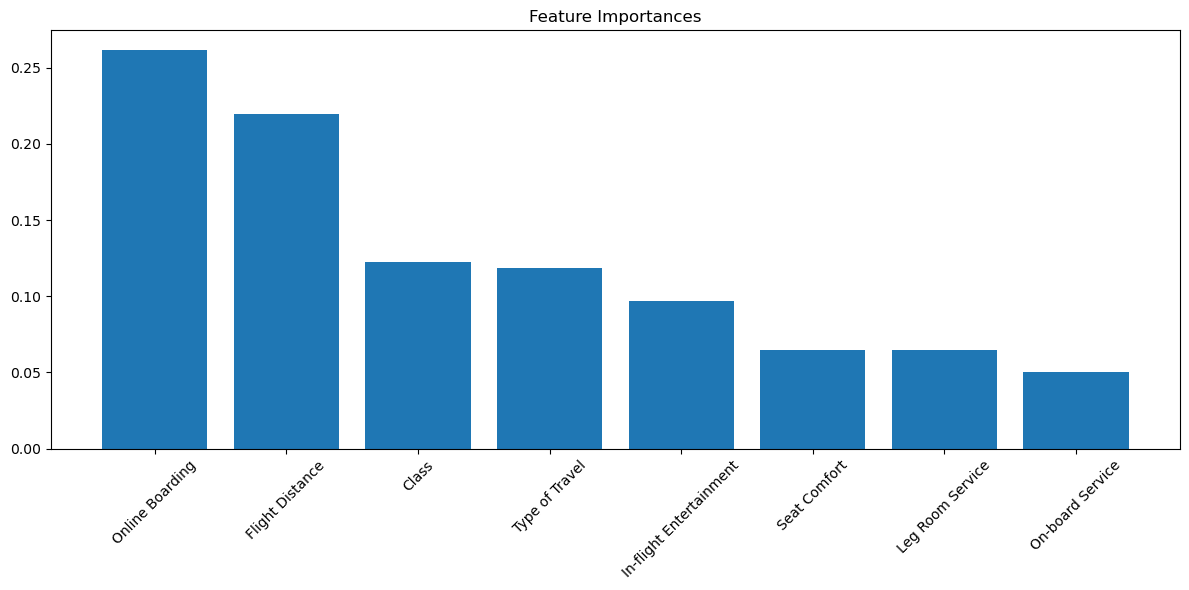

In [35]:
# NumPy array for advanced indexing
feature_names = np.array(selected_features)

# Get feature importances and indices sorted by importance
importances = random_forest.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=45)
plt.tight_layout()
plt.show()

### Optimizing and Evaluating a Random Forest Model with Grid Search

In [36]:

# Split the dataset to reduce the tuning dataset size
X_sample, _, y_sample, _ = train_test_split(X_train, y_train, train_size=0.8, random_state=10, stratify=y_train)

# Define the model
rf = RandomForestClassifier(random_state=10)

# Set up a smaller grid of parameters to test
param_grid = {
    'n_estimators': [100, 200, 300],  # Fewer options
    'max_depth': [None, 12],     # Major impact parameters
}

# Set up the GridSearch with fewer folds in cross-validation
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1)  # `n_jobs=-1` to use all processors
CV_rf.fit(X_sample, y_sample)  # Use only a subset of data for tuning

# Best parameters found
print("Best parameters:", CV_rf.best_params_)

# Use the best model from grid search to make predictions on the entire test set
y_pred = CV_rf.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
random_forest_grid_search_test_accuracy = accuracy

Best parameters: {'max_depth': 12, 'n_estimators': 200}


### Calculating the accuracy of the Random Forest Model Using Grid Search

In [37]:
# Print accuracy of the Random Forest Model using Grid Search
print("Accuracy of Random Forest Model using Grid Search on the test set:", accuracy)
print("{:.2%}".format(accuracy), "of the test instances were correctly classified.")

Accuracy of Random Forest Model using Grid Search on the test set: 0.9066737853710625
90.67% of the test instances were correctly classified.


### Classification Report for the Random Forest Model Using Grid Search

In [38]:
#Evaluating Random Forest Model using Grid Search
print("Random Forest Model using Grid Search Classification Report for test set:\n", classification_report(y_test, y_pred))

Random Forest Model using Grid Search Classification Report for test set:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91      9824
           1       0.92      0.88      0.90      8906

    accuracy                           0.91     18730
   macro avg       0.91      0.91      0.91     18730
weighted avg       0.91      0.91      0.91     18730



### Key Findings:
1. **Logistic Regression Performance**: With an accuracy of ≈85.08% on the test set, the Logistic Regression model provides a solid baseline for predictive modeling, demonstrating its utility in capturing basic patterns in passenger satisfaction data.
2. **K-Nearest Neighbors (KNN) Enhancements**: Initial results with KNN showed moderate accuracy, but after applying feature scaling and hyperparameter tuning, its performance increased to ≈89.34%. This improvement highlights the impact of model-specific optimizations on prediction accuracy.
3. **Random Forest Superiority**: The Random Forest model, particularly when optimized, emerged as the most effective, with the highest accuracy at ≈90.67%. This indicates its superior capability to manage and interpret the complex interactions within the dataset.
4. **Deep Learning Application**: The Neural Network model reached an accuracy of ≈90.56%, emphasizing the advantages of deep learning techniques in handling high-dimensional data and extracting nuanced relationships not easily modeled by traditional algorithms.

### Outcome:
- **Comprehensive Model Evaluation**: The comparative evaluation of various predictive models has provided deep insights into each model's capabilities and overall accuracy. This analysis is crucial for understanding the strengths and weaknesses of each approach without explicitly favoring any single model at this stage.
- **Guidance for Strategic Model Improvements**: The detailed performance analysis of each model facilitates targeted improvements. It enables the development team to refine algorithms where needed and explore additional enhancements that could increase the predictive power of the models.
- **Operational Implications for Service Personalization**: Insights derived from the model evaluations will guide the airline in personalizing and enhancing service delivery. The objective is to apply these insights strategically across different areas of passenger service to improve satisfaction scores, thereby fostering greater loyalty and a better overall travel experience.

### 5. Model Accuracy Visualization

### Objective
Evaluate and compare the accuracy of various predictive models to determine the most effective approach for predicting passenger satisfaction.

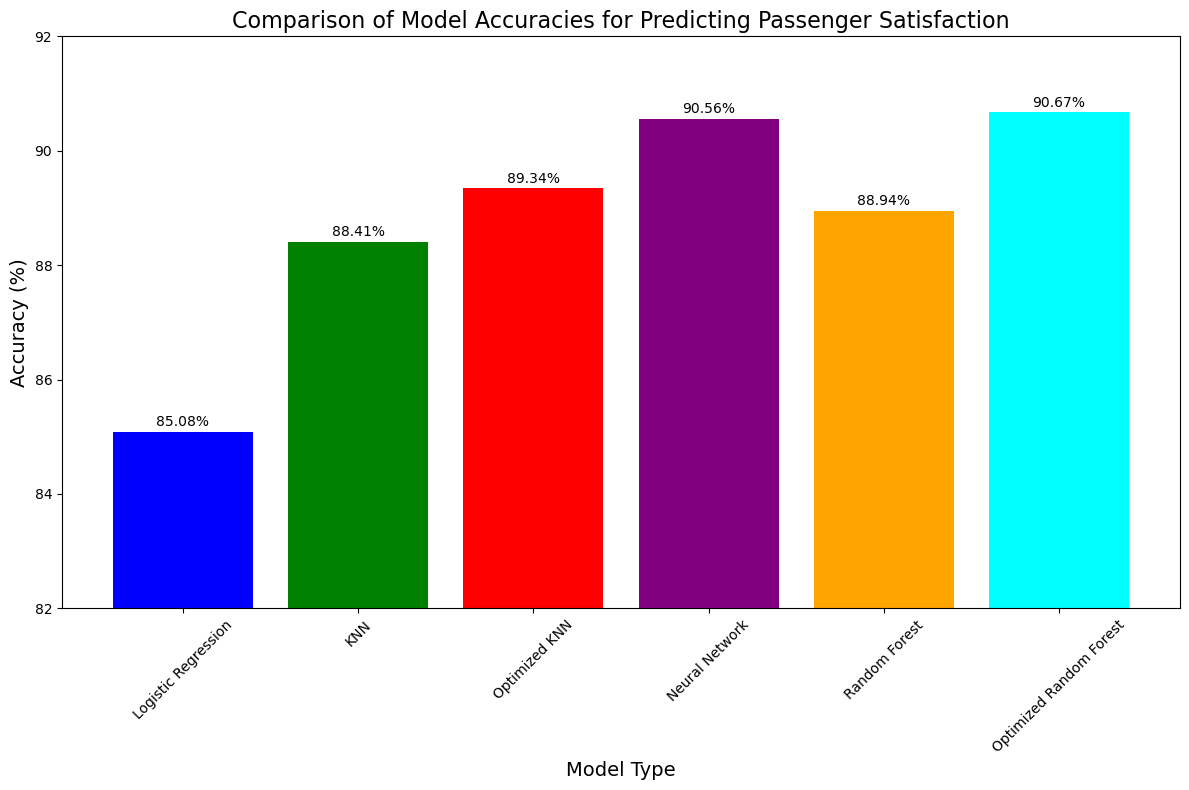

In [39]:
# Accuracy values obtained from the different models
model_names = ['Logistic Regression', 'KNN', 'Optimized KNN', 'Neural Network', 'Random Forest', 'Optimized Random Forest']
accuracies = [round(accuracy * 100, 2) for accuracy in [
    logistic_test_accuracy, 
    knn_test_accuracy, 
    knn_grid_search_test_accuracy, 
    sequential_neural_network_test_accuracy, 
    random_forest_test_accuracy, 
    random_forest_grid_search_test_accuracy
]]


# Creating the bar chart
plt.figure(figsize=(12, 8))  # Increased figure size
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan'])

# Adding text labels for each bar
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.05, f'{accuracy:.2f}%', ha='center', va='bottom')

plt.xlabel('Model Type', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.title('Comparison of Model Accuracies for Predicting Passenger Satisfaction', fontsize=16)
plt.ylim([82, 92])  # Narrower range to focus on the small differences
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Key Findings:
- The graph illustrates that the Optimized Random Forest model achieves the highest accuracy at ≈90.67%, closely followed by the Neural Network model at ≈90.56%. The standard Random Forest and Optimized KNN models also perform well, indicating robustness in handling complex patterns within the data. Logistic Regression, while providing a solid baseline, shows relatively lower accuracy, suggesting its limitations in capturing more nuanced relationships in the data compared to more complex models.

### Outcome:
- **Strategic Implementation**: The visualization of model accuracies guides the strategic selection of the Optimized Random Forest model for operational deployment due to its superior performance. This model is likely to provide the most accurate predictions of passenger satisfaction, essential for enhancing service quality.
- **Continuous Model Refinement**: The insights from the accuracy comparison underline the importance of ongoing model refinement and testing. Regular updates and tuning of the models, especially those with close performance metrics like the Neural Network and Random Forest models, are crucial for maintaining their predictive accuracy over time.
- **Tailored Service Offerings**: The deployment of the most accurate models enables the airline to tailor its services more effectively to meet passenger expectations, thereby potentially increasing satisfaction and loyalty.


### 6. Strategic Decision Making

### Objective
Leverage insights from the dataset to inform broader strategic decisions regarding service offerings, pricing strategies, and customer relationship management.

# Insights and Strategic Actions from Airline Passenger Satisfaction Analysis

## Executive Summary
The analysis of Airline Passenger Satisfaction data provides critical insights that can transform airline service offerings, optimize operational efficiency, and enhance customer engagement strategies. This document summarizes the key findings from the data analysis and outlines actionable strategies to improve overall passenger satisfaction.

### Key Insights and Strategic Actions

### 1. Customer Service
- **Objective:** Improve critical service aspects identified as significant to passenger satisfaction.
- **Findings:** Key factors such as Online Boarding, In-flight Entertainment, and Seat Comfort are highly correlated with passenger satisfaction.
- **Actions:** 
  - **Online Boarding:** Streamline the process to reduce friction and enhance user experience.
  - **In-flight Entertainment:** Diversify entertainment options to cater to a broader audience.
  - **Seat Comfort:** Upgrade seating arrangements, especially in economy classes, to enhance comfort over long durations.

### 2. Operational Efficiency
- **Objective:** Minimize flight delays and enhance punctuality, directly impacting passenger satisfaction.
- **Findings:** A strong negative impact of flight delays on passenger satisfaction was observed, especially delays longer than 10 minutes.
- **Actions:** 
  - **Optimize Scheduling:** Implement advanced analytics to predict and mitigate potential delays.
  - **Communicate Proactively:** Keep passengers informed in real-time about any changes to improve trust and satisfaction.

### 3. Customer Segmentation
- **Objective:** Tailor services based on distinct passenger segments to better meet their expectations.
- **Findings:** Significant differences in satisfaction levels between business and leisure travelers, and among different travel classes.
- **Actions:** 
  - **Service Customization:** Introduce tiered service enhancements focused on high-demand features for each segment.
  - **Marketing Strategies:** Develop targeted marketing campaigns that highlight premium services to leisure travelers.

### 4. Predictive Analytics
- **Objective:** Employ predictive models to foresee passenger satisfaction and adjust services proactively.
- **Findings:** Machine learning models like Random Forest and Neural Networks effectively predict passenger satisfaction with high accuracy.
- **Actions:** 
  - **Model Deployment:** Utilize the best-performing models (e.g., Optimized Random Forest) to predict and improve passenger satisfaction in real-time.
  - **Continuous Improvement:** Regularly update models with new data and refine algorithms to maintain accuracy.


## Conclusion
The strategic use of airline passenger satisfaction data not only enhances operational efficiencies but also significantly boosts passenger satisfaction. By implementing these data-driven strategies, airlines can ensure a competitive edge in the market, fostering loyalty and enhancing the overall passenger experience.